In [1]:
from ultralytics import YOLOv10
import cv2
import supervision as sv
model = YOLOv10("/scr/u/yuanzf/yolov10/releases/download/v1.1/yolov10x.pt")

/scr/u/yuanzf/anaconda3/envs/yolov10/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pandas as pd
ROOTFOLDER = "/lustre1/g/geog_pyloo/05_timemachine"
PANO_PATH = "{ROOTFOLDER}/GSV/gsv_rgb/{cityabbr}/gsvmeta/gsv_pano.csv"
META_PATH = "{ROOTFOLDER}/GSV/gsv_rgb/{cityabbr}/gsvmeta/{cityabbr}_meta.csv"
city = "Hong Kong"
cityabbr = city.lower().replace(" ", "")
meta_df = pd.read_csv(META_PATH.format(ROOTFOLDER=ROOTFOLDER, cityabbr=cityabbr))

In [34]:
path_test = meta_df[meta_df['panoid']=='uy8xzQX8Q8uf9y_oiVi3Zw']['path'].values[2]
path_test

'/lustre1/g/geog_pyloo/05_timemachine/GSV/gsv_rgb/hongkong/img_rgb/8_1/c/a/uy8xzQX8Q8uf9y_oiVi3Zw_180.jpg'

In [35]:
image = cv2.imread(path_test)
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)
detections


0: 640x640 13 persons, 5 cars, 23.0ms
Speed: 18.3ms preprocess, 23.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Detections(xyxy=array([[     109.36,      237.67,      257.27,      349.87],
       [     45.146,      212.08,      87.997,      242.78],
       [    0.13312,      221.78,      46.895,      337.85],
       [     300.75,      225.72,      318.91,      277.87],
       [     237.53,      220.08,      247.62,      245.29],
       [     259.81,      225.61,      272.97,      264.76],
       [     272.19,      223.27,       289.2,      264.79],
       [     219.51,      223.43,      232.04,      257.15],
       [     356.83,      240.21,       381.5,      298.45],
       [     29.597,      213.37,      47.799,      227.87],
       [     345.31,      224.66,      368.48,      277.33],
       [          0,      204.17,      25.083,      230.58],
       [      212.3,      224.07,      220.11,      246.12],
       [     157.53,       216.4,      167.03,       239.8],
       [     201.66,       216.4,      210.87,      242.45],
       [     215.33,      216.46,      221.73,      227.68],
       [

In [40]:
print(results

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [56]:
df = pd.DataFrame({
        # "object_id": detections.ids,
        "object_name": detections.data['class_name'],
        "confidence": detections.confidence,
    })
# pd.concat(df, pd.DataFrame({})
pd.concat([pd.DataFrame({
        # "object_id": detections.ids,
        "object_name": detections.data['class_name'],
        "confidence": detections.confidence,
    }), pd.DataFrame(detections.xyxy, columns = ["x1","y1","x2", "y2"])], axis = 1)

,object_name,confidence,x1,y1,x2,y2
0,car,0.948175,109.361000,237.667053,257.268951,349.873810
1,car,0.914342,45.145588,212.078217,87.997452,242.775604
2,car,0.851994,0.133119,221.782959,46.894997,337.853973
3,person,0.825209,300.751312,225.719513,318.909698,277.873108
4,person,0.787424,237.528259,220.080032,247.623871,245.285950
5,person,0.774780,259.812286,225.607834,272.973358,264.757446
6,person,0.766362,272.190918,223.269424,289.200073,264.793518
7,person,0.750745,219.514038,223.425476,232.040741,257.154572
8,person,0.716790,356.828461,240.210083,381.498962,298.454163
9,car,0.667815,29.596577,213.369537,47.799187,227.872452


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


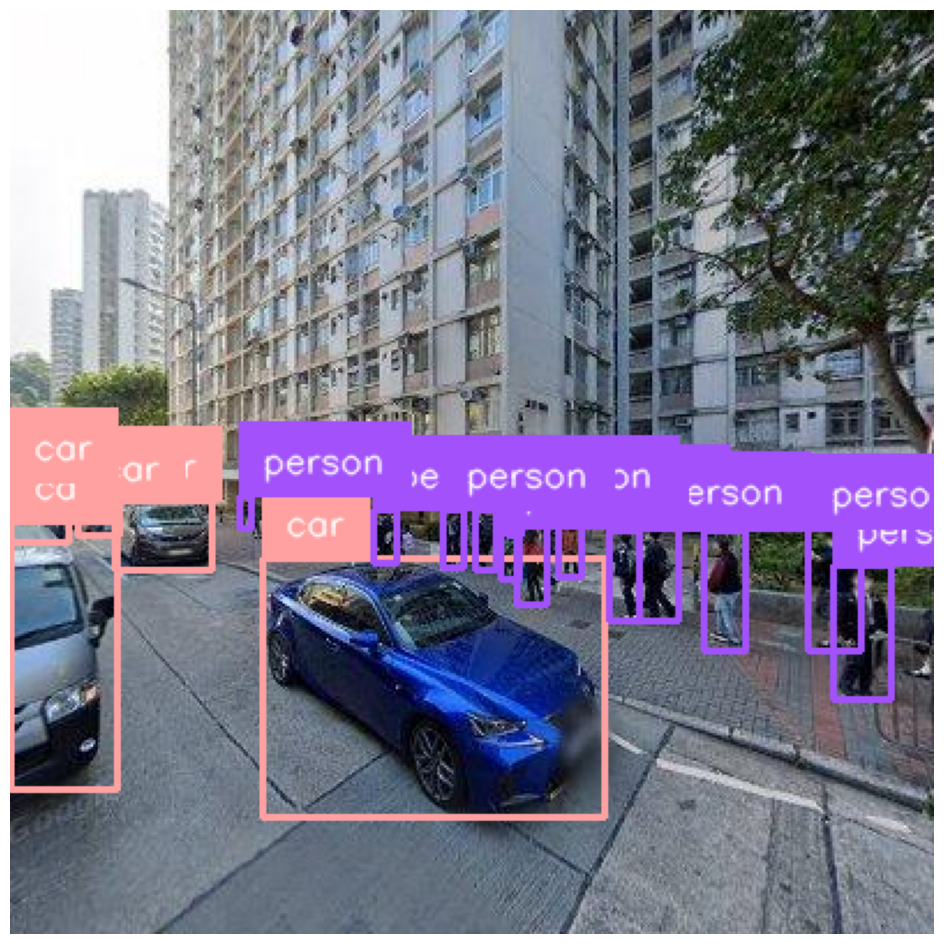

In [36]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [4]:
# construct .sh files to run all cities
import pandas as pd
import os
city_meta = pd.read_csv("../city_meta.csv")
cityls = city_meta['City'].values
cityls = [x for x in cityls if x not in ["Hong Kong", "New York"]]
# 10 city per file
n = 10
line = """
python 02_object_detect.py --city "{city}"
"""
filename = "object_run_{batch}.sh"
for i in range(0, len(cityls), n):
    with open(filename.format(batch=i//n), "w") as f:
        for city in cityls[i:i+n]:
            f.write(line.format(city=city) + "\n")

In [5]:
# check result
df = pd.read_parquet("/lustre1/g/geog_pyloo/05_timemachine/_curated/hongkong/n=0_objects.parquet")
df.head()

,object_name,confidence,x1,y1,x2,y2,img
0,motorcycle,0.874409,0.078969,264.615631,69.238144,352.449402,Zt4pQVSLaglLUGrQ_quQlA_0.jpg
1,motorcycle,0.791737,326.897644,265.124512,399.800659,333.633179,Zt4pQVSLaglLUGrQ_quQlA_270.jpg
2,car,0.920763,74.709023,203.574615,155.222458,262.731842,dyPS4_m8kzbt52M4QrpZQg_0.jpg
3,car,0.717333,149.012833,203.326950,169.008362,223.513824,dyPS4_m8kzbt52M4QrpZQg_0.jpg
4,car,0.713463,177.854858,205.827667,200.904297,224.342377,dyPS4_m8kzbt52M4QrpZQg_0.jpg
